In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn.utils import resample

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# for feature selection
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('forest_fire.csv')
df_base = df

In [3]:
df.cont_clean_date.isna().sum()

27890

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [5]:
df.shape

(55367, 43)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


Things to get rid of
* fire_size
* fire_mag
* fire name
* columns where weather file not found (rows)
* putout_time
* disc_date_final
* cont_clean_date
* wstation
* weather_file

## Dropping columns

In [7]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'fire_name','cont_clean_date', 'disc_date_final', 'cont_date_final', 
           'putout_time', 'disc_date_pre', 'disc_pre_year', 
           'disc_pre_month', 'wstation_usaf', 'dstation_m',
           'wstation_wban', 'wstation_byear', 'wstation_eyear',
           'fire_mag', 'weather_file']

In [8]:
df = df.drop(columns=to_drop)

## Getting rid of null rows

In [9]:
df = df[(df.Temp_cont != -1)]

# Chaning Temp to F

In [10]:
def c_to_f(c):
    return (c * 9/5) + 32

df.loc[:,'Temp_pre_30':'Temp_cont'] = df.loc[:,'Temp_pre_30':'Temp_cont'].applymap(lambda x: c_to_f(x))

# Looking at temp values

In [11]:
df.sort_values(by='Temp_cont').head(50)

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
54206,4500.00,F,Debris Burning,30.652527,-99.246458,TX,2/24/2011,Feb,12,11.838771,13.832253,2.372089,-8.950000,3.553472,3.835556,3.182738,2.112500,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.455785
8665,18.00,C,Arson,32.914590,-94.060420,TX,3/19/1994,Mar,12,8.600000,32.000000,32.000000,6.350000,2.200000,0.000000,0.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.245103
15163,1.00,B,Debris Burning,31.824482,-95.740013,TX,2/6/2011,Feb,12,8.847646,13.744542,3.342500,6.767684,3.499444,3.783611,3.436310,3.271944,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.261574
21407,2.00,B,Debris Burning,46.481300,-94.897411,MN,12/1/2008,Dec,9,31.024511,23.061667,24.092857,7.603437,3.308621,3.159259,2.594841,3.521664,83.023496,83.413310,83.287736,85.991638,0.0,0.0,0.0,0.0,0.246669
9016,0.90,B,Equipment Use,30.256000,-99.243000,TX,2/11/2011,Feb,12,7.923979,7.186042,9.134107,8.735677,3.429167,3.355833,3.294048,3.252778,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.295810
811,70.00,C,Debris Burning,26.382500,-98.605000,TX,2/8/2005,Feb,12,23.963250,33.740000,34.083929,10.257500,4.748329,4.486034,4.246707,3.025000,74.643068,72.612426,64.562874,72.791667,0.0,0.0,0.0,0.0,0.293079
45104,1.00,B,Debris Burning,29.052580,-97.204628,TX,12/19/2013,Dec,12,17.544000,8.511500,15.813929,10.997299,4.266528,4.005278,3.675000,3.878135,75.470833,80.250000,81.011905,80.247588,0.0,0.0,0.0,0.0,0.277506
45267,12.50,C,Debris Burning,30.494800,-93.428600,LA,12/18/2013,Dec,12,17.822500,8.875500,11.985714,12.085552,4.272361,4.029722,3.752976,3.820000,75.501389,81.180556,81.214286,79.955224,0.0,0.0,0.0,0.0,0.241013
54062,64936.00,G,Missing/Undefined,33.052200,-103.800600,NM,2/27/2011,Feb,16,8.070272,9.079819,-5.522988,12.225625,3.443056,3.277778,2.147024,3.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.343071
32254,160.00,D,Missing/Undefined,30.445556,-93.639167,LA,3/12/2011,Mar,12,8.653096,3.299940,8.876119,12.430313,3.260694,2.676667,2.827381,2.502083,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.243008


In [12]:
df.stat_cause_descr.value_counts()

Debris Burning       10720
Arson                 6848
Lightning             6467
Miscellaneous         6345
Missing/Undefined     3361
Equipment Use         3219
Campfire              1030
Children               955
Smoking                852
Railroad               694
Powerline              408
Fireworks              175
Structure               58
Name: stat_cause_descr, dtype: int64

# Size Binned into large small

In [20]:
cond = [
    df.fire_size_class.isin(['A','B','C']),
    df.fire_size_class.isin(['D','E','F','G'])
]
out = [
    0,
    1
]

df['size_bin'] = np.select(cond,out)

In [21]:
df.size_bin.value_counts()

0    34739
1     6393
Name: size_bin, dtype: int64

# Size changed to numbers

In [14]:
cond = [
    df.fire_size_class == 'A',
    df.fire_size_class == 'B',
    df.fire_size_class == 'C',
    df.fire_size_class == 'D',
    df.fire_size_class == 'E',
    df.fire_size_class == 'F',
    df.fire_size_class == 'G',
]
out = [
    1,
    2,
    3,
    4,
    5,
    6,
    7
]

df['size_number'] = np.select(cond,out)

In [26]:
df.groupby('size_bin').median()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_number
size_bin,,,,,,,,,,,,,,,,,,,,,,
0,2.81,34.2833,-89.940112,12,56.850664,57.418167,58.083832,46.486105,2.926353,2.849444,2.777143,1.661195,64.255981,62.283293,60.304668,39.822581,0.8,0.0,0.0,0.0,0.207162,2
1,5000.00,39.7747,-112.258600,12,65.486704,66.475657,67.718947,64.677778,3.177127,3.084722,2.958974,2.795026,47.059420,44.774194,42.640351,40.791667,0.0,0.0,0.0,0.0,0.247924,7


# looking at correlations to binned

In [17]:
df.corrwith(df['size_bin']).abs().sort_values(ascending=False)

size_bin       1.000000
size_number    0.922111
longitude      0.426884
fire_size      0.347112
latitude       0.305982
Temp_cont      0.225969
Hum_pre_30     0.218659
Wind_cont      0.205225
Hum_pre_15     0.182686
Hum_pre_7      0.172894
Vegetation     0.134180
remoteness     0.132204
Temp_pre_7     0.126384
Temp_pre_15    0.117108
Temp_pre_30    0.104931
Prec_pre_30    0.067091
Prec_cont      0.060948
Wind_pre_15    0.058880
Prec_pre_15    0.058544
Wind_pre_30    0.056043
Wind_pre_7     0.049791
Hum_cont       0.049150
Prec_pre_7     0.041559
dtype: float64

# Looking at temp/hum/veg/long
# versus size of fire

Text(0.5, 1.0, 'long')

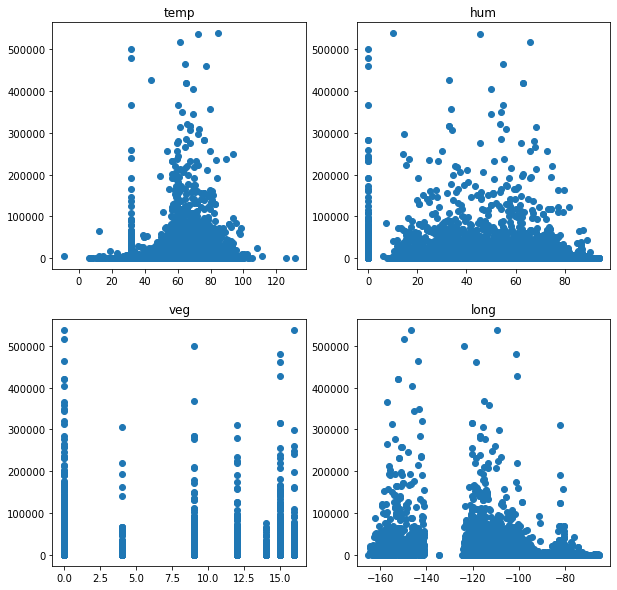

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2,2)
y = df.fire_size
x1 = df.Temp_cont
x2 = df.Hum_cont
x3 = df.Vegetation
x4 = df.longitude
ax[0,0].scatter(x1,y)
ax[0,0].set_title('temp')
ax[0,1].scatter(x2,y)
ax[0,1].set_title('hum')
ax[1,0].scatter(x3,y)
ax[1,0].set_title('veg')
ax[1,1].scatter(x4,y)
ax[1,1].set_title('long')

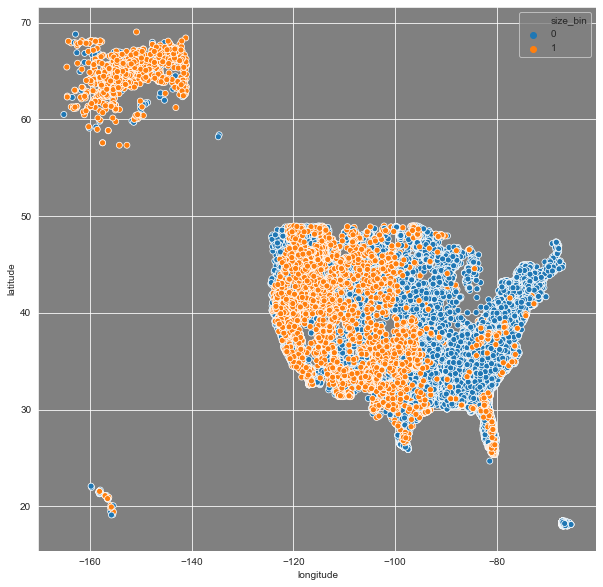

In [25]:
sns.set_style("darkgrid", {"axes.facecolor": "0.5"})

x = df.longitude
y = df.latitude

fig = plt.figure(figsize=(10,10))
ax = fig.subplots
ax = sns.scatterplot(x=x, y=y,
              hue=df.size_bin,
              data=df);

In [23]:
df[(df.longitude > -100)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number
count,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000,28992.000000
mean,261.012158,34.505882,-87.281956,11.738756,56.520210,56.657091,56.865570,49.465240,2.866276,2.744797,2.684001,1.722555,60.760137,57.022509,54.843669,35.557038,45.187438,20.233123,8.277663,27.537476,0.189343,0.054429,2.395523
std,3500.547587,5.038284,7.327966,4.958158,16.477458,16.729294,17.033338,18.586055,1.326887,1.460028,1.554731,1.776243,20.064796,23.106616,24.172601,33.417210,146.624101,73.196111,39.272324,78.428316,0.085127,0.226866,0.843514
min,0.510000,17.958364,-99.992100,0.000000,-56.578947,-34.600000,-3.228036,-8.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,2.000000
25%,1.000000,31.613785,-94.023992,12.000000,44.379801,44.082376,43.857466,32.000000,2.122092,1.942799,1.778142,0.000000,59.914151,56.619482,52.862275,0.000000,0.000000,0.000000,0.000000,0.000000,0.135392,0.000000,2.000000
50%,3.000000,33.704895,-87.532935,12.000000,54.425094,55.036382,55.780656,46.562185,2.894432,2.811508,2.741818,1.736440,66.086481,64.300202,62.649528,53.208309,2.900000,0.000000,0.000000,0.000000,0.186469,0.000000,2.000000
75%,10.000000,36.319445,-81.773858,15.000000,71.066289,70.915619,71.262332,64.746082,3.676556,3.664532,3.668655,3.158402,71.199285,70.272242,69.645888,67.292472,55.400000,20.100000,3.300000,18.100000,0.245540,0.000000,3.000000
max,309200.000000,48.998667,-65.417709,16.000000,94.100000,94.280000,106.100000,97.221418,25.700000,25.700000,25.700000,17.300000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,0.829507,1.000000,7.000000


In [22]:
df[(df.longitude < -100)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number
count,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000
mean,7063.782596,41.125832,-116.064690,9.419722,63.300654,63.895159,64.270827,56.749262,3.112180,3.028419,2.932784,2.223071,42.066297,40.375438,38.956224,30.536431,13.101738,6.005215,2.793953,6.513255,0.375196,0.396655,3.870747
std,26809.875329,8.093984,12.279053,6.558648,15.478596,15.919912,16.416185,19.691139,1.571309,1.623069,1.663134,1.979464,21.072613,21.619274,21.941456,26.073365,63.407021,39.831831,26.185701,29.168297,0.175113,0.489223,2.131417
min,0.520000,19.099096,-165.116700,0.000000,-1.840000,-1.840000,-5.522988,12.225625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,35.386415,-120.370373,0.000000,55.309852,55.623087,55.704821,32.000000,2.260581,2.138452,1.995065,0.000000,30.610511,28.016894,26.167166,0.000000,0.000000,0.000000,0.000000,0.000000,0.304180,0.000000,2.000000
50%,15.000000,39.900556,-115.108900,12.000000,66.809684,67.548747,68.085714,61.039450,3.136111,3.070819,2.954592,2.309677,44.307513,42.863168,41.017857,34.265823,0.000000,0.000000,0.000000,0.000000,0.402115,0.000000,3.000000
75%,4532.500000,44.740790,-108.369095,15.000000,74.272198,75.195134,76.035283,73.387810,4.086306,4.040346,3.967857,3.578522,56.626744,55.216517,54.073182,51.409856,9.200000,2.100000,0.000000,0.000000,0.491952,1.000000,6.000000
max,538049.000000,69.047200,-100.000648,16.000000,115.880000,124.822034,131.000000,131.000000,29.800000,29.800000,21.100000,24.200000,94.000000,94.000000,94.000000,94.000000,1898.000000,1273.000000,1187.000000,1118.000000,1.000000,1.000000,7.000000


In [162]:
df[(df.longitude < -130)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,29715.856339,61.410528,-152.134369,0.868597,55.401608,57.300508,59.756866,58.579773,2.389291,2.339999,2.232417,2.192816,53.234257,52.762169,50.212736,56.007907,11.539087,5.942539,2.539644,14.125390,0.707071,0.810690,5.883073
std,60817.327495,11.429742,5.898118,3.111186,11.012658,11.230272,11.931415,10.637472,1.147756,1.220089,1.290806,1.197165,20.311615,20.967389,21.207397,22.896323,39.771228,18.335686,10.937513,29.970003,0.115661,0.391973,1.850223
min,0.600000,19.099096,-165.116700,0.000000,15.934577,10.016501,9.698182,18.969091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524072,0.000000,2.000000
25%,3262.000000,63.118902,-157.114150,0.000000,49.741625,52.445421,55.062881,56.250528,1.841163,1.752853,1.553747,1.577843,50.815439,48.950669,44.702761,54.633087,0.000000,0.000000,0.000000,0.000000,0.625366,1.000000,6.000000
50%,8651.450000,64.467183,-152.516700,0.000000,56.453984,58.455678,61.458510,59.782741,2.315268,2.233588,2.127530,2.098427,57.795039,57.893000,54.302157,62.593773,0.000000,0.000000,0.000000,0.000000,0.692177,1.000000,7.000000
75%,25790.325000,65.803500,-147.389500,0.000000,60.865302,63.094779,67.138497,62.853545,3.000252,2.999772,2.845637,2.858952,65.293437,66.079293,64.242082,69.359754,12.675000,5.900000,0.300000,17.550000,0.776666,1.000000,7.000000
max,537627.000000,69.047200,-134.583333,12.000000,107.020075,124.822034,125.626087,101.943982,7.851200,7.868947,8.539474,7.958065,86.010355,85.278932,86.272727,87.894309,912.400000,278.400000,167.700000,378.300000,1.000000,1.000000,7.000000


- temps right in between 10 and 30 are the sweet spot for big fires
- humidity does have a similar trend but not so much, there is a strange thing happening in between 140 and 120 long
    - there are lot of big fires in alaska < -130 long
- larger fires happen on west coast more


# Wind Outlier Fixing

In [163]:
df.Wind_cont.sort_values(ascending=False).head(50)

51106    24.200000
51203    24.200000
50401    17.300000
12257    11.800000
30617    11.544000
43884    11.466667
1251     11.425000
43462    10.890278
53707    10.687500
47598    10.329577
54617    10.095833
53020    10.091429
53714    10.071292
41941    10.071292
53011    10.028125
18908    10.002128
35153     9.987218
5426      9.920000
42951     9.828070
54273     9.655714
7056      9.625000
19948     9.625000
54969     9.493750
54205     9.438889
53368     9.402083
20230     9.391667
54208     9.189189
50956     9.133333
52059     9.130357
48812     9.065248
45360     9.047619
53569     8.956579
50303     8.950000
35829     8.925000
5686      8.885714
52060     8.881818
52399     8.856250
15855     8.832673
51328     8.812500
53022     8.737500
43472     8.724132
52912     8.722289
12725     8.722289
53784     8.718571
34190     8.683886
4640      8.654167
48150     8.625000
53573     8.610000
15015     8.579408
54274     8.575000
Name: Wind_cont, dtype: float64

In [29]:
df.Temp_cont

0        76.150329
1        50.806936
2        56.653880
3        32.000000
6        32.000000
           ...    
55360    31.905451
55361    59.412991
55362    55.836183
55364    81.762921
55366    66.230390
Name: Temp_cont, Length: 41132, dtype: float64

In [35]:
df.Temp_pre_30.value_counts()

32.000000    2557
55.400000      28
71.600000      19
69.800000      11
59.000000      11
             ... 
34.171582       1
72.997328       1
72.943321       1
58.236196       1
68.391086       1
Name: Temp_pre_30, Length: 35522, dtype: int64

In [36]:
df.Temp_pre_7.value_counts()

32.000000    4597
77.000000      12
80.600000      11
62.600000      10
78.392632       9
             ... 
69.766598       1
54.961250       1
47.402617       1
79.413187       1
53.750292       1
Name: Temp_pre_7, Length: 32668, dtype: int64

In [40]:
df.sort_values(by='Temp_cont',ascending=True).head(50)

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number
54206,4500.00,F,Debris Burning,30.652527,-99.246458,TX,2/24/2011,Feb,12,11.838771,13.832253,2.372089,-8.950000,3.553472,3.835556,3.182738,2.112500,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.455785,1,6
8665,18.00,C,Arson,32.914590,-94.060420,TX,3/19/1994,Mar,12,8.600000,32.000000,32.000000,6.350000,2.200000,0.000000,0.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.245103,0,3
15163,1.00,B,Debris Burning,31.824482,-95.740013,TX,2/6/2011,Feb,12,8.847646,13.744542,3.342500,6.767684,3.499444,3.783611,3.436310,3.271944,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.261574,0,2
21407,2.00,B,Debris Burning,46.481300,-94.897411,MN,12/1/2008,Dec,9,31.024511,23.061667,24.092857,7.603437,3.308621,3.159259,2.594841,3.521664,83.023496,83.413310,83.287736,85.991638,0.0,0.0,0.0,0.0,0.246669,0,2
9016,0.90,B,Equipment Use,30.256000,-99.243000,TX,2/11/2011,Feb,12,7.923979,7.186042,9.134107,8.735677,3.429167,3.355833,3.294048,3.252778,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.295810,0,2
811,70.00,C,Debris Burning,26.382500,-98.605000,TX,2/8/2005,Feb,12,23.963250,33.740000,34.083929,10.257500,4.748329,4.486034,4.246707,3.025000,74.643068,72.612426,64.562874,72.791667,0.0,0.0,0.0,0.0,0.293079,0,3
45104,1.00,B,Debris Burning,29.052580,-97.204628,TX,12/19/2013,Dec,12,17.544000,8.511500,15.813929,10.997299,4.266528,4.005278,3.675000,3.878135,75.470833,80.250000,81.011905,80.247588,0.0,0.0,0.0,0.0,0.277506,0,2
45267,12.50,C,Debris Burning,30.494800,-93.428600,LA,12/18/2013,Dec,12,17.822500,8.875500,11.985714,12.085552,4.272361,4.029722,3.752976,3.820000,75.501389,81.180556,81.214286,79.955224,0.0,0.0,0.0,0.0,0.241013,0,3
54062,64936.00,G,Missing/Undefined,33.052200,-103.800600,NM,2/27/2011,Feb,16,8.070272,9.079819,-5.522988,12.225625,3.443056,3.277778,2.147024,3.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.343071,1,7
32254,160.00,D,Missing/Undefined,30.445556,-93.639167,LA,3/12/2011,Mar,12,8.653096,3.299940,8.876119,12.430313,3.260694,2.676667,2.827381,2.502083,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.243008,1,4


In [48]:
df[(df.Temp_pre_30==32)].size_bin.value_counts()

0    2128
1     429
Name: size_bin, dtype: int64

In [57]:
df[(df.Temp_pre_7==32)].describe()

,fire_size,latitude,longitude,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.0,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,1756.563609,34.860355,-94.814157,11.139874,40.115680,35.042366,32.0,34.231154,1.323193,0.439248,0.000653,0.215799,28.447501,8.389170,0.015414,3.384660,5.873787,0.487448,0.000783,0.205830,0.239618,0.133130,2.737220
std,13542.582674,5.764527,14.760668,5.543817,13.361550,9.546994,0.0,9.448153,1.827850,1.315327,0.044292,1.065510,34.459816,22.443322,1.045100,14.453166,28.789410,4.301806,0.053096,4.826787,0.137055,0.339752,1.395205
min,0.520000,17.970539,-163.469100,0.000000,-56.578947,-34.600000,32.0,6.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008359,0.000000,2.000000
25%,1.500000,31.661400,-103.304200,12.000000,32.000000,32.000000,32.0,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144185,0.000000,2.000000
50%,4.000000,33.910000,-90.781830,12.000000,32.000000,32.000000,32.0,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200011,0.000000,2.000000
75%,16.000000,36.895800,-84.304321,15.000000,47.000000,32.000000,32.0,32.000000,2.636182,0.000000,0.000000,0.000000,67.005755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283151,0.000000,3.000000
max,499945.000000,67.816000,-65.627907,16.000000,98.600000,98.600000,32.0,102.920000,29.800000,29.800000,3.003070,24.200000,96.000000,94.000000,70.859031,94.000000,1147.000000,93.400000,3.600000,146.300000,0.970039,1.000000,7.000000


In [74]:
test = 0

In [69]:
#test = df[(df.Temp_pre_30!=float(32))| (df.Temp_pre_15!=float(32)) | (df.Temp_pre_7!=float(32)) | (df.Temp_cont!=float(32))]

# Getting Rid of Tempurature Outliers

In [75]:
test = df[(df.Temp_pre_30!=float(32))]
test = test[(df.Temp_pre_15!=float(32))]
test = test[(df.Temp_pre_7!=float(32))]
test = test[(df.Temp_cont!=float(32))]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [70]:
test.shape

(38689, 28)

In [76]:
test.Temp_pre_30.value_counts()

76.392253     9
73.687606     8
56.453984     8
83.514521     7
67.947732     7
             ..
61.060727     1
44.670568     1
45.551590     1
29.950116     1
104.000000    1
Name: Temp_pre_30, Length: 22213, dtype: int64

In [63]:
test.size_bin.value_counts()

0    32710
1     5979
Name: size_bin, dtype: int64

Text(0.5, 1.0, 'long')

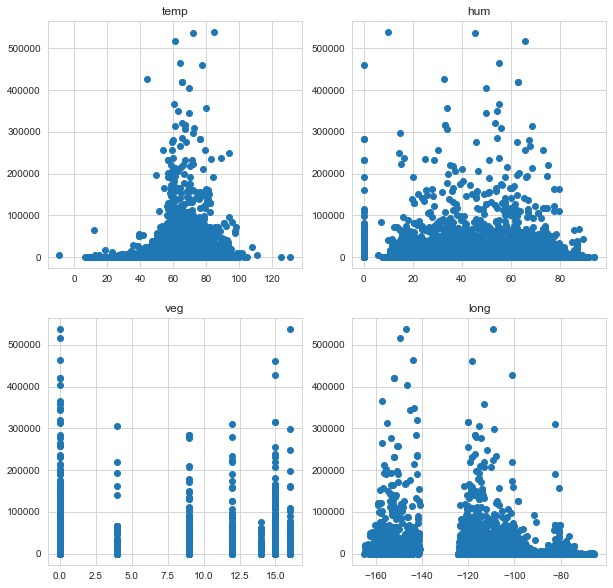

In [77]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2,2)
y = test.fire_size
x1 = test.Temp_cont
x2 = test.Hum_cont
x3 = test.Vegetation
x4 = test.longitude
ax[0,0].scatter(x1,y)
ax[0,0].set_title('temp')
ax[0,1].scatter(x2,y)
ax[0,1].set_title('hum')
ax[1,0].scatter(x3,y)
ax[1,0].set_title('veg')
ax[1,1].scatter(x4,y)
ax[1,1].set_title('long')

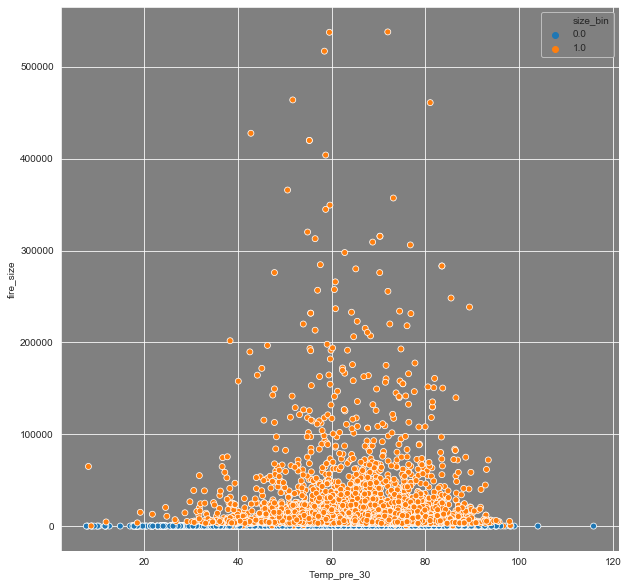

In [87]:
sns.set_style("darkgrid", {"axes.facecolor": "0.5"})

x = df.Temp_pre_30
y = df.fire_size

fig = plt.figure(figsize=(10,10))
ax = fig.subplots
ax = sns.scatterplot(x=x, y=y,
          hue=test.size_bin,
          data=test);

# Negatives

In [92]:
df[(df.Temp_pre_30<33)].size_bin.value_counts(normalize=True)

0    0.858486
1    0.141514
Name: size_bin, dtype: float64

In [93]:
df.head(0)

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,size_bin,size_number


# Feature Engineering
- cold_front (cold for a certain amount of days)
- if_rain (if it has rained)
- binning tempuratures
- dummy discovery month
- bin some longitudes
- west coast (longitude bin)
- dummy states (individual states or regions)
- dummy vegitation
- is_very_windy (wind over 30 days more than x)
- is_humid (over/under some value)
- is_remote (over 0.x is remote)

# Baseline Models

In [ ]:
# fitting all 3 models
X = df[final_features]
y = df['default']
# train test split + scaler info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Logistic

In [97]:
def LogRegTest(input_x,input_y):
    lr = LogisticRegression(random_state=1,C=1e9)
    lr.fit(input_x,input_y)
    pred_train = lr.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=2,C=1e9,class_weight='balanced',penalty='l2')

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)



## Knn

In [96]:
def KnnTest(input_x,input_y):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(input_x,input_y)
    pred_train = knn.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1,algorithm='auto',weights='uniform')

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)

y_pred_test = knn.predict(X_test)


## D-Tree

In [95]:
def DTreeTest(input_x,input_y):
    tree = DecisionTreeClassifier()
    tree.fit(input_x,input_y)
    pred_train = tree.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [ ]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=12, min_samples_split=17,criterion='gini',min_samples_leaf=4)

tree = tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)

pred_test = tree.predict(X_test)